In [2]:
import tensorflow as tf
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)


E0000 00:00:1735615753.963350      13 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:479
D1231 03:29:13.971466412      13 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D1231 03:29:13.971482883      13 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D1231 03:29:13.971487073      13 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D1231 03:29:13.971490035      13 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D1231 03:29:13.971492876      13 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (defau

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


I0000 00:00:1735615766.368277      13 service.cc:145] XLA service 0x590c63706a00 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735615766.368332      13 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1735615766.368336      13 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1735615766.368339      13 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1735615766.368342      13 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1735615766.368345      13 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1735615766.368347      13 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1735615766.368350      13 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1735615766.368352      13 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


In [6]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
import tensorflow as tf
from keras.losses import binary_crossentropy
from keras.layers import BatchNormalization
def dice_coefficient(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    
    return numerator / (denominator + tf.keras.backend.epsilon())

def dice_loss(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return 1 - (numerator / (denominator + tf.keras.backend.epsilon()))

def combined_loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)


def unet(pretrained_weights=None, input_size=(512,512,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    conv4 = BatchNormalization()(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs, conv10)

    model.compile(optimizer=Adam(learning_rate=1e-4), loss=combined_loss, metrics=[dice_coefficient])

    return model

In [7]:
images_folder='/kaggle/input/final-images/images'
masks_folder='/kaggle/input/final-masks/masks'

In [8]:
import os

image_filenames = sorted(os.listdir(images_folder))
mask_filenames = sorted(os.listdir(masks_folder))

In [9]:
trainX = [os.path.join(images_folder, img) for img in image_filenames]
trainY = [os.path.join(masks_folder, mask) for mask in mask_filenames]

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.DataFrame({'X': trainX, 'Y': trainY})


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['X'],df['Y'],test_size=0.15,random_state=42)

In [13]:
len(X_train)

1312

In [14]:
import pandas as pd
train_df=pd.DataFrame({'X':X_train,'Y':y_train})
valid_df=pd.DataFrame({'X':X_test,'Y':y_test})
train_df.to_csv('train_df.csv')
valid_df.to_csv('valid_df.csv')

In [1]:
def load_image(path):
    original_sizes = []  
    image_list = np.zeros((len(path), 512, 512, 1))
    
    for i, fig in enumerate(path):
        image1 = cv2.imread(fig, 0)
        image1 = cv2.equalizeHist(image1)
        h, w = image1.shape
        original_sizes.append((h, w))
        ratio = min(512 / w, 512 / h)
        image1 = cv2.resize(image1, (int(w * ratio), int(h * ratio)), interpolation=cv2.INTER_CUBIC)
        img_h, img_w = image1.shape

        pad_h = 512 - img_h
        pad_w = 512 - img_w
        pad_top = pad_h // 2
        pad_bottom = pad_h - pad_top
        pad_left = pad_w // 2
        pad_right = pad_w - pad_left
        image1 = np.pad(image1, pad_width=((pad_top, pad_bottom), (pad_left, pad_right)), mode='constant', constant_values=255)
        
        image1 = image1 / 255.0
        image1 = image1.reshape(512, 512, 1)
        image_list[i] = image1
    
    return image_list, original_sizes


In [16]:
import numpy as np
import cv2
import keras

class DataGenerator(keras.utils.Sequence):
    def __init__(self, df, batch_size, dim=(512, 512), n_channels=1, shuffle=True):
        self.batch_size = batch_size
        self.df = df
        self.n_channels = n_channels
        self.dim = dim
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(self.df.shape[0] / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        rows = [self.df.iloc[k] for k in indexes]
        X, Y = self._data_generate_x(rows)
        return X, Y

    def on_epoch_end(self):
        self.indexes = np.arange(self.df.shape[0])
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def _resize_and_pad(self, image, target_dim):
        """Resize and pad the image to maintain aspect ratio."""
        h, w = image.shape
        target_h, target_w = target_dim
        ratio = min(target_w / w, target_h / h)
        resized_image = cv2.resize(image, (int(w * ratio), int(h * ratio)), interpolation=cv2.INTER_CUBIC)
        
        padded_image = np.full(target_dim, 255, dtype=np.float32)  
        img_h, img_w = resized_image.shape
        pad_h = (target_h - img_h) // 2
        pad_w = (target_w - img_w) // 2
        
        padded_image[pad_h:pad_h + img_h, pad_w:pad_w + img_w] = resized_image
        return padded_image, (pad_h, pad_w, img_h, img_w)  

    def _data_generate_x(self, rows):
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        Y = np.empty((self.batch_size, *self.dim, self.n_channels))

        self.padding_info = []  

        for i, row in enumerate(rows):
            image1 = cv2.imread(row['X'], 0)
            image1, padding = self._resize_and_pad(image1, self.dim)
            image1 = image1 / 255.0  # Normalize
            image1 = image1.reshape(*self.dim, self.n_channels)
            X[i, ] = image1

            image2 = cv2.imread(row['Y'], 0)
            image2, _ = self._resize_and_pad(image2, self.dim)
            image2 = image2 / 255.0
            image2 = image2.reshape(*self.dim, self.n_channels)
            Y[i, ] = image2

            self.padding_info.append(padding)

        return X, Y


In [17]:
batch_size = 8  
dim = (512, 512)  
n_channels = 1  

train_generator = DataGenerator(train_df, batch_size=batch_size, dim=dim, n_channels=n_channels, shuffle=True)
valid_generator = DataGenerator(valid_df, batch_size=batch_size, dim=dim, n_channels=n_channels, shuffle=False)

In [34]:
print(len(train_df))

1312


X_train_batch shape: (8, 512, 512, 1)
Y_train_batch shape: (8, 512, 512, 1)


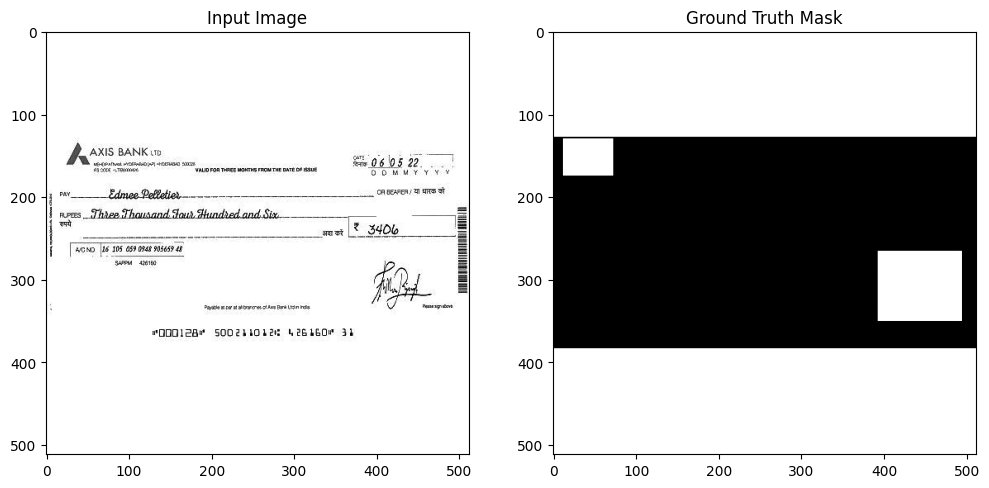

In [28]:
X_train_batch, Y_train_batch = train_generator[10]
print("X_train_batch shape:", X_train_batch.shape)  
print("Y_train_batch shape:", Y_train_batch.shape)  

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(X_train_batch[0].reshape(512, 512), cmap='gray') 
plt.title('Input Image')

plt.subplot(1, 2, 2)
plt.imshow(Y_train_batch[0].reshape(512, 512), cmap='gray') 
plt.title('Ground Truth Mask')

plt.show()

In [35]:
from keras.callbacks import Callback

class MonitorLayerOutputs(Callback):
    def on_epoch_end(self, epoch, logs=None):
        layer_outputs = [layer.output for layer in self.model.layers]
        debug_model = Model(inputs=self.model.input, outputs=layer_outputs)
        outputs = debug_model.predict(trainx[0:1])  
        for i, output in enumerate(outputs):
            print(f"Output of layer {i} ({self.model.layers[i].name}): {output}")



In [36]:
print(len(train_generator))

164


In [37]:
from keras.callbacks import ModelCheckpoint
with tpu_strategy.scope():
    model=unet(input_size=(512,512,1))
    checkpoint=ModelCheckpoint('model_at_epoch_cheq_merged.keras',monitor='val_loss',save_best_only=True,save_weights_only=False,mode='min')
    callbacks_list=[checkpoint]
    history = model.fit(
    x=train_generator,         
    validation_data=valid_generator,  
    epochs=150,
    verbose=1,
    callbacks=callbacks_list  
)
    model.save("Uend.h5")

I0000 00:00:1735616108.238362      13 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
/usr/local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/150


2024-12-31 03:35:27.557644: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1735616129.145763     839 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(9d412a120e254030:0:0), session_name()
I0000 00:00:1735616182.520732     839 tpu_compile_op_common.cc:245] Compilation of 9d412a120e254030:0:0 with session name  took 53.37492098s and succeeded
I0000 00:00:1735616182.561923     839 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(9d412a120e254030:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_15040934923240484515", property.function_library_fingerprint = 15427135892747351022, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z 

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - dice_coefficient: 0.9015 - loss: 0.2965

2024-12-31 03:37:01.044162: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add/ReadVariableOp.
I0000 00:00:1735616221.461458     752 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(e54924e279f8aeed:0:0), session_name()
I0000 00:00:1735616233.345026     752 tpu_compile_op_common.cc:245] Compilation of e54924e279f8aeed:0:0 with session name  took 11.883520625s and succeeded
I0000 00:00:1735616233.348619     752 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(e54924e279f8aeed:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_6935131683200367201", property.function_library_fingerprint = 9260272372477691638, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, t

164/164 ━━━━━━━━━━━━━━━━━━━━ 115s 337ms/step - dice_coefficient: 0.9018 - loss: 0.2955 - val_dice_coefficient: 0.7428 - val_loss: 2.3747
Epoch 2/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 40s 239ms/step - dice_coefficient: 0.9850 - loss: 0.0462 - val_dice_coefficient: 0.7439 - val_loss: 3.3186
Epoch 3/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 40s 240ms/step - dice_coefficient: 0.9883 - loss: 0.0359 - val_dice_coefficient: 0.7888 - val_loss: 2.8090
Epoch 4/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 42s 251ms/step - dice_coefficient: 0.9897 - loss: 0.0316 - val_dice_coefficient: 0.8207 - val_loss: 1.7962
Epoch 5/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 40s 240ms/step - dice_coefficient: 0.9912 - loss: 0.0273 - val_dice_coefficient: 0.7821 - val_loss: 2.0139
Epoch 6/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 41s 241ms/step - dice_coefficient: 0.9921 - loss: 0.0246 - val_dice_coefficient: 0.5883 - val_loss: 1.8194
Epoch 7/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 40s 240ms/step - dice_coefficient: 0.9914 - loss: 0.0266 - val_dice_coefficient: 0

In [2]:
from tensorflow.keras.models import load_model

In [3]:
def dice_coefficient(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    
    return numerator / (denominator + tf.keras.backend.epsilon())

In [4]:
model = load_model('/kaggle/input/kr_unet/keras/default/1/model_at_epoch.keras', custom_objects={'dice_coefficient': dice_coefficient}, compile=False)

In [5]:
import tensorflow as tf

def dice_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return 1 - numerator / (denominator + tf.keras.backend.epsilon())


def combined_loss(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    dice = dice_loss(y_true, y_pred)

model.compile(optimizer='adam', loss=combined_loss, metrics=[dice_coefficient])


In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


image_path = '/kaggle/input/augumented-cheq/augumented_cheques/images/1362_aug_4.png'
original_image = cv2.imread(image_path)
print(f"Original image shape: {original_image.shape}")
original_height, original_width = original_image.shape[:2]

# Load the image to predict
img,_ = load_image([image_path])
modified_img=cv2.resize(original_image,(512,512))
print(modified_img.shape)
image_predict = model.predict(img)
image_predict = image_predict.squeeze()  

binary_mask = (image_predict > 0.5).astype(np.uint8)

resized_mask = cv2.resize(binary_mask, (original_width, original_height), interpolation=cv2.INTER_LINEAR)
redacted_image = original_image.copy()
print(redacted_image.shape)
redacted_image1 = original_image.copy()

redacted_image[resized_mask == 1] = (0, 0, 0) 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image with Redaction")
plt.imshow(cv2.cvtColor(redacted_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Redacted Areas (Mask)")
plt.imshow(cv2.cvtColor(modified_img, cv2.COLOR_BGR2RGB))
plt.imshow(resized_mask, cmap='gray')
plt.axis('off')


plt.show()


Original image shape: (927, 2240, 3)


NameError: name 'load_image' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


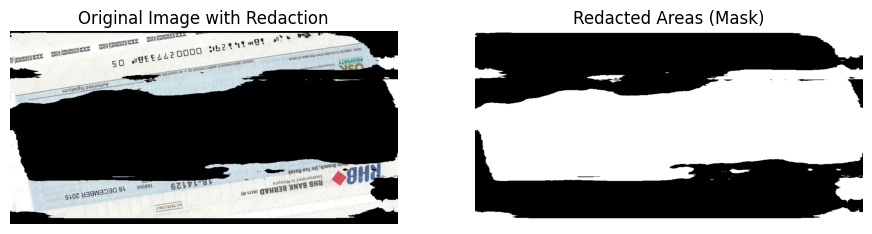

In [25]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

image_path = '/kaggle/input/augumented-cheq/augumented_cheques/images/1372_aug_3.png'
original_image = cv2.imread(image_path)
original_height, original_width = original_image.shape[:2]

img,_ = load_image([image_path])
modified_img = cv2.resize(original_image, (512, 512))

image_predict = model.predict(img)
image_predict = image_predict.squeeze()  

binary_mask = (image_predict > 0.5).astype(np.uint8)

resized_mask = cv2.resize(binary_mask, (original_width, original_height), interpolation=cv2.INTER_LINEAR)

shift_value = 0  
M = np.float32([[1, 0, shift_value], [0, 1, 0]])
shifted_mask = cv2.warpAffine(resized_mask, M, (original_width, original_height))

redacted_image = original_image.copy()
redacted_image[shifted_mask == 1] = (0, 0, 0) 

plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image with Redaction")
plt.imshow(cv2.cvtColor(redacted_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Redacted Areas (Mask)")
plt.imshow(resized_mask,cmap='gray')
cv2.imwrite("masked.jpg",redacted_image)
plt.axis('off')

plt.show()


In [ ]:
pip install flask flask_cors

In [7]:
import tensorflow as tf
import numpy as np
import threading
import os
import cv2
import matplotlib.pyplot as plt
from flask import Flask, request, jsonify, send_from_directory
from flask_cors import CORS

app = Flask(__name__)
CORS(app)

def dice_coefficient(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

model = tf.keras.models.load_model(
    '/kaggle/working/model_at_epoch_cheq_merged.keras',
    custom_objects={'dice_coefficient': dice_coefficient},
    compile=False
)

def load_image_from_array(image_array):
    h, w = image_array.shape
    original_size = (h, w)

    image = cv2.resize(image_array, (512, 512), interpolation=cv2.INTER_AREA)
    image = image / 255.0  
    image = image.reshape(512, 512, 1)  
    return image, original_size

@app.route('/predict', methods=['POST'])
def unet_model():
    try:
        if 'image' not in request.files:
            return jsonify({"error": "No image file provided"}), 400

        file = request.files['image']
        image_array = cv2.imdecode(np.frombuffer(file.read(), np.uint8), cv2.IMREAD_GRAYSCALE)
        if image_array is None:
            raise ValueError("Invalid image file path or unsupported format.")

        original_image = image_array.copy()  
        processed_image, original_size = load_image_from_array(image_array)

        
        plt.imshow(processed_image.squeeze(), cmap='gray')
        plt.title("Processed Image")
        plt.show()

        img = np.expand_dims(processed_image, axis=0)
        predicted_mask = model.predict(img).squeeze()
        binary_mask = (predicted_mask > 0.5).astype(np.uint8)
        resized_mask = cv2.resize(binary_mask, (original_size[1], original_size[0]), interpolation=cv2.INTER_NEAREST)
        redacted_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)
        redacted_image[resized_mask == 1] = (0, 0, 0) 
        output_dir = "output"
        os.makedirs(output_dir, exist_ok=True)

        redacted_image_path = os.path.join(output_dir, "redacted_image.jpg")
        mask_path = os.path.join(output_dir, "mask.png")
        cv2.imwrite(redacted_image_path, redacted_image)
        cv2.imwrite(mask_path, resized_mask * 255)
        plt.imshow(cv2.cvtColor(redacted_image, cv2.COLOR_BGR2RGB))
        plt.title("Redacted Image")
        plt.show()
        print(f"Redacted image saved to: {redacted_image_path}")
        print(f"Mask saved to: {mask_path}")
        return jsonify({
            "message": "Redaction completed successfully",
            "redacted_image_path": redacted_image_path,
            "mask_path": mask_path
        }), 200


    except Exception as e:
        print(f"Error: {e}")
        return False



@app.route('/output/<path:filename>', methods=['GET'])
def serve_file(filename):
    return send_from_directory('output', filename)

def run_flask():
    app.run(host='0.0.0.0', port=5000)

thread = threading.Thread(target=run_flask)
thread.daemon = True
thread.start()


 * Serving Flask app '__main__'
 * Debug mode: off
Error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1



In [ ]:
import numpy as np

def prepare_for_model(image_list):
    image_array = np.array(image_list)
    
    image_array = image_array / 255.0
    
    image_array = image_array.reshape((-1, 512, 512, 1))
    
    return image_array

In [ ]:
print("Input NaN:", np.isnan(trainx).any(), "Input Inf:", np.isinf(trainx).any())
print("Labels NaN:", np.isnan(trainy).any(), "Labels Inf:", np.isinf(trainy).any())

In [ ]:
print("trainx shape:", trainx.shape)
print("trainy shape:", trainy.shape)

In [2]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the custom metric function
def dice_coefficient(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())




In [1]:
from tensorflow.keras.models import load_model

In [3]:
model_unet = load_model('/kaggle/input/kr_unet/keras/default/1/model_at_epoch.keras', custom_objects={'dice_coefficient': dice_coefficient}, compile=False)

In [4]:
!pip install pyngrok
from pyngrok import ngrok


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [5]:
!ngrok config add-authtoken 2p1xs2zvdvqrugouYSgILGiq0ki_5mkxzrhGk8DJ87aU5LXVu


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml                                


In [6]:
from pyngrok import ngrok

# Connect ngrok to the Flask server
public_url = ngrok.connect(5002)  # Flask default port
print(f"Public URL: {public_url}")


Public URL: NgrokTunnel: "https://4e50-35-185-228-57.ngrok-free.app" -> "http://localhost:5002"


In [7]:
#final flask server

In [10]:
from flask import Flask, request, jsonify, send_from_directory
import tensorflow as tf
import numpy as np
import threading
from flask_cors import CORS
import os
import cv2

app = Flask(__name__)
CORS(app)

def load_image_from_array(image_array):
    h, w = image_array.shape[:2]  # Shape will be (h, w, 3) for color images
    original_size = (h, w)

    # Convert to grayscale for model input
    gray_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
    # Resize the grayscale image for the model
    image = cv2.resize(gray_image, (512, 512), interpolation=cv2.INTER_AREA)
    image = image / 255.0
    image = image.reshape(512, 512, 1)
    return image, original_size

@app.route('/predict', methods=['POST'])
def unet_model():
    try:
        if 'image' not in request.files:
            return jsonify({"error": "No image file provided"}), 400

        file = request.files['image']
        # Load the image in color (BGR by default in OpenCV)
        image_array = cv2.imdecode(np.frombuffer(file.read(), np.uint8), cv2.IMREAD_COLOR)

        if image_array is None:
            return jsonify({"error": "Invalid image file"}), 400

        # Keep a copy of the original color image
        original_image = image_array.copy()  # This is in BGR format
        # Process the image for the model (convert to grayscale internally)
        processed_image, original_size = load_image_from_array(image_array)

        # Model prediction
        img = np.expand_dims(processed_image, axis=0)
        predicted_mask = model_unet.predict(img).squeeze()
        binary_mask = (predicted_mask > 0.5).astype(np.uint8)

        # Resize the mask to match the original image dimensions
        resized_mask = cv2.resize(binary_mask, (original_size[1], original_size[0]), interpolation=cv2.INTER_NEAREST)

        # The original_image is already in BGR format, no need for GRAY2BGR conversion
        redacted_image = original_image.copy()

        # Ensure the mask dimensions match the image dimensions
        if redacted_image.shape[:2] != resized_mask.shape:
            print(f"Warning: Image shape {redacted_image.shape[:2]} does not match mask shape {resized_mask.shape}")
            resized_mask = cv2.resize(resized_mask, (redacted_image.shape[1], redacted_image.shape[0]), interpolation=cv2.INTER_NEAREST)

        # Apply the mask to the color image (set redacted areas to black)
        redacted_image[resized_mask == 1] = (0, 0, 0)  # Black in BGR

        # Convert the redacted image from BGR to RGB for output
        redacted_image = cv2.cvtColor(redacted_image, cv2.COLOR_BGR2RGB)

        # Save the output
        output_dir = "output"
        os.makedirs(output_dir, exist_ok=True)
        redacted_image_path = os.path.join(output_dir, "redacted_image.jpg")
        mask_path = os.path.join(output_dir, "mask.png")

        cv2.imwrite(redacted_image_path, cv2.cvtColor(redacted_image, cv2.COLOR_RGB2BGR))  # Convert back to BGR for saving
        cv2.imwrite(mask_path, resized_mask * 255)

        return jsonify({
            "message": "Redaction completed successfully",
            "redacted_image_path": redacted_image_path,
            "mask_path": mask_path
        }), 200

    except Exception as e:
        return jsonify({"error": str(e)}), 500

@app.route('/output/<path:filename>', methods=['GET'])
def serve_file(filename):
    return send_from_directory('output', filename)

def run_flask():
    app.run(host='0.0.0.0', port=5002)

thread = threading.Thread(target=run_flask)
thread.daemon = True
thread.start()

 * Serving Flask app '__main__'
 * Debug mode: off


I0000 00:00:1744097152.500904      95 service.cc:145] XLA service 0x7da140016890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744097152.500976      95 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


I0000 00:00:1744097159.294063      95 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [9]:
!pip install flask_cors

In [17]:
from flask import Flask, request, jsonify, send_from_directory
import tensorflow as tf
import numpy as np
import threading
from flask_cors import CORS
import os
import cv2
import matplotlib.pyplot as plt

app = Flask(__name__)
CORS(app)



# Function to preprocess the image
def load_image_from_array(image_array):
    h, w = image_array.shape
    original_size = (h, w)

    image = cv2.resize(image_array, (512, 512), interpolation=cv2.INTER_AREA)

    image = image / 255.0
    image = image.reshape(512, 512, 1)
    return image, original_size

@app.route('/predict', methods=['POST'])
def unet_model():
    try:
        if 'image' not in request.files:
            return jsonify({"error": "No image file provided"}), 400

        file = request.files['image']
        image_array = cv2.imdecode(np.frombuffer(file.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

        if image_array is None:
            return jsonify({"error": "Invalid image file"}), 400
        # image_array = cv2.imread(pth, cv2.IMREAD_GRAYSCALE)

        original_image = image_array.copy() 
        processed_image, original_size = load_image_from_array(image_array)
        plt.imshow(processed_image)

        img = np.expand_dims(processed_image, axis=0)
        predicted_mask = model_unet.predict(img).squeeze()
        binary_mask = (predicted_mask > 0.5).astype(np.uint8)

        resized_mask = cv2.resize(binary_mask, (original_size[1], original_size[0]), interpolation=cv2.INTER_NEAREST)

        redacted_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)

        if redacted_image.shape[:2] != resized_mask.shape:
            print(f"Warning: Image shape {redacted_image.shape[:2]} does not match mask shape {resized_mask.shape}")
            resized_mask = cv2.resize(resized_mask, (redacted_image.shape[1], redacted_image.shape[0]), interpolation=cv2.INTER_NEAREST)

        redacted_image[resized_mask == 1] = (0, 0, 0)

        output_dir = "output"
        os.makedirs(output_dir, exist_ok=True)
        redacted_image_path = os.path.join(output_dir, "redacted_image.jpg")
        mask_path = os.path.join(output_dir, "mask.png")

        cv2.imwrite(redacted_image_path, redacted_image)
        cv2.imwrite(mask_path, resized_mask * 255)

        return jsonify({
            "message": "Redaction completed successfully",
            "redacted_image_path": redacted_image_path,
            "mask_path": mask_path
        }), 200

    except Exception as e:
        return jsonify({"error": str(e)}), 500


@app.route('/output/<path:filename>', methods=['GET'])
def serve_file(filename):
    return send_from_directory('output', filename)

def run_flask():
    app.run(host='0.0.0.0', port=5001)

thread = threading.Thread(target=run_flask)
thread.daemon = True
thread.start()

 * Serving Flask app '__main__'
 * Debug mode: off
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
